<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [258]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [259]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [260]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [261]:
boston_df=pd.read_csv(boston_url)
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1


### Variables


#### CRIM - per capita crime rate by town

#### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

#### INDUS - proportion of non-retail business acres per town.

#### CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

#### NOX - nitric oxides concentration (parts per 10 million)

#### RM - average number of rooms per dwelling

#### AGE - proportion of owner-occupied units built prior to 1940

#### DIS - weighted distances to five Boston employment centres

#### RAD - index of accessibility to radial highways

#### TAX - full-value property-tax rate per $10,000

#### PTRATIO - pupil-teacher ratio by town

#### LSTAT - % lower status of the population

#### MEDV - Median value of owner-occupied homes in $1000's

# Task 2


### Box Plot for MEDV

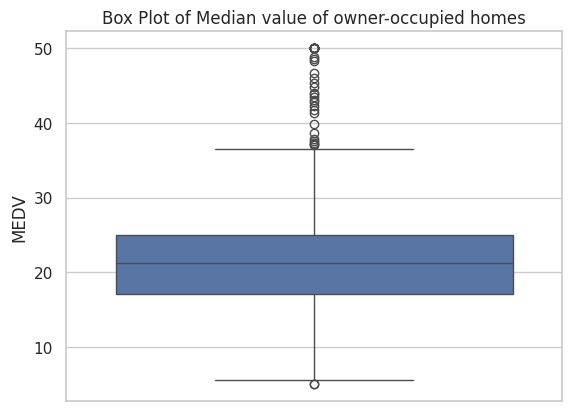

In [262]:
ax = sns.boxplot(data = boston_df.MEDV)
pyplot.title("Box Plot of Median value of owner-occupied homes")
pyplot.show()

#Box plot shows Meadian around 20

### Bar Plot for CHAS


In [263]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


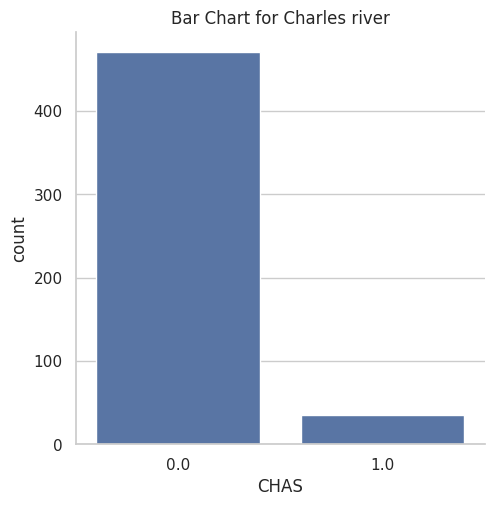

In [264]:
sns.set(style="whitegrid")
#ax = sns.barplot(data = boston_df.CHAS)
chasChart = sns.catplot(x='CHAS', kind='count', data=boston_df)
#ax = sns.barplot(x="", y="eval", data=division_eval)
pyplot.title("Bar Chart for Charles river")
pyplot.show()
#Home not bound by river are 0 and bound by river is 1.
#More homes seem to be not bound by river

###  Boxplot for the MEDV variable vs the AGE


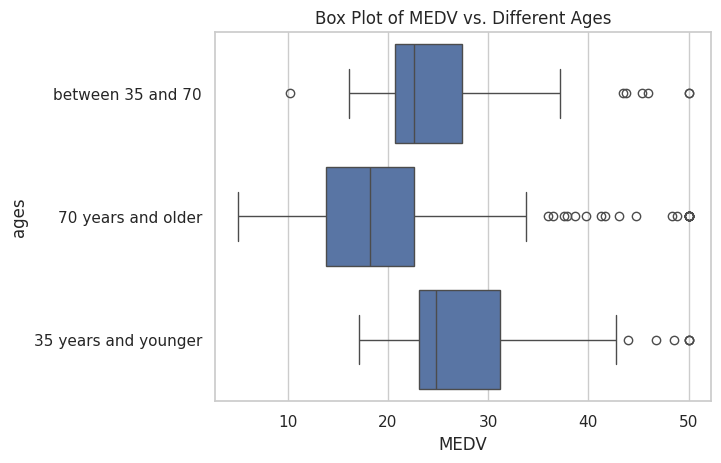

In [265]:
#adds labeling to the graph
boston_df.loc[boston_df.AGE <= 35, 'ages'] = '35 years and younger'
boston_df.loc[(boston_df.AGE > 35) & (boston_df.AGE < 70), 'ages'] = 'between 35 and 70'
boston_df.loc[boston_df.AGE >= 70, 'ages'] = '70 years and older'

pyplot.title("Box Plot of MEDV vs. Different Ages")
#Plots Graph
ax = sns.boxplot(x=boston_df.MEDV, y=boston_df.ages, data = boston_df)
pyplot.show()
#The groups with the lowest median is 70 years and older

###  Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town


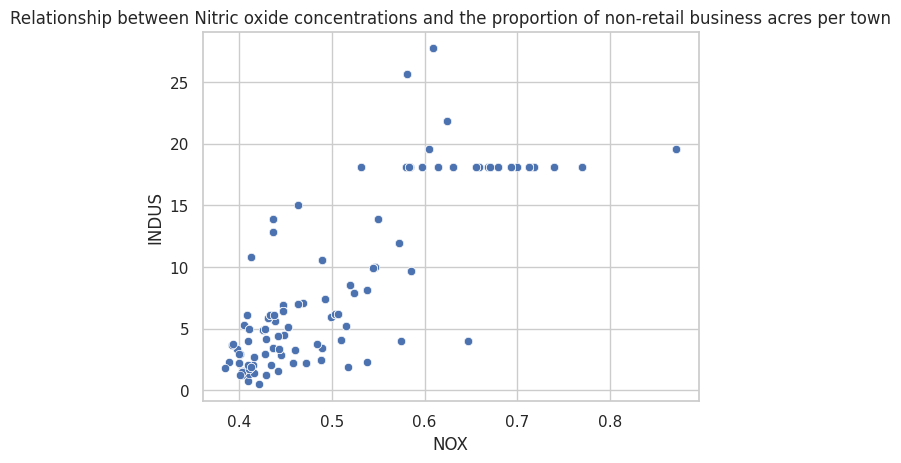

In [266]:
ax = sns.scatterplot(x= boston_df.NOX, y= boston_df.INDUS, data=boston_df)
pyplot.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
pyplot.show()
#The Scatter plots seems more clustered where NOX is 0.4. 

### Histogram for the pupil to teacher ratio variable

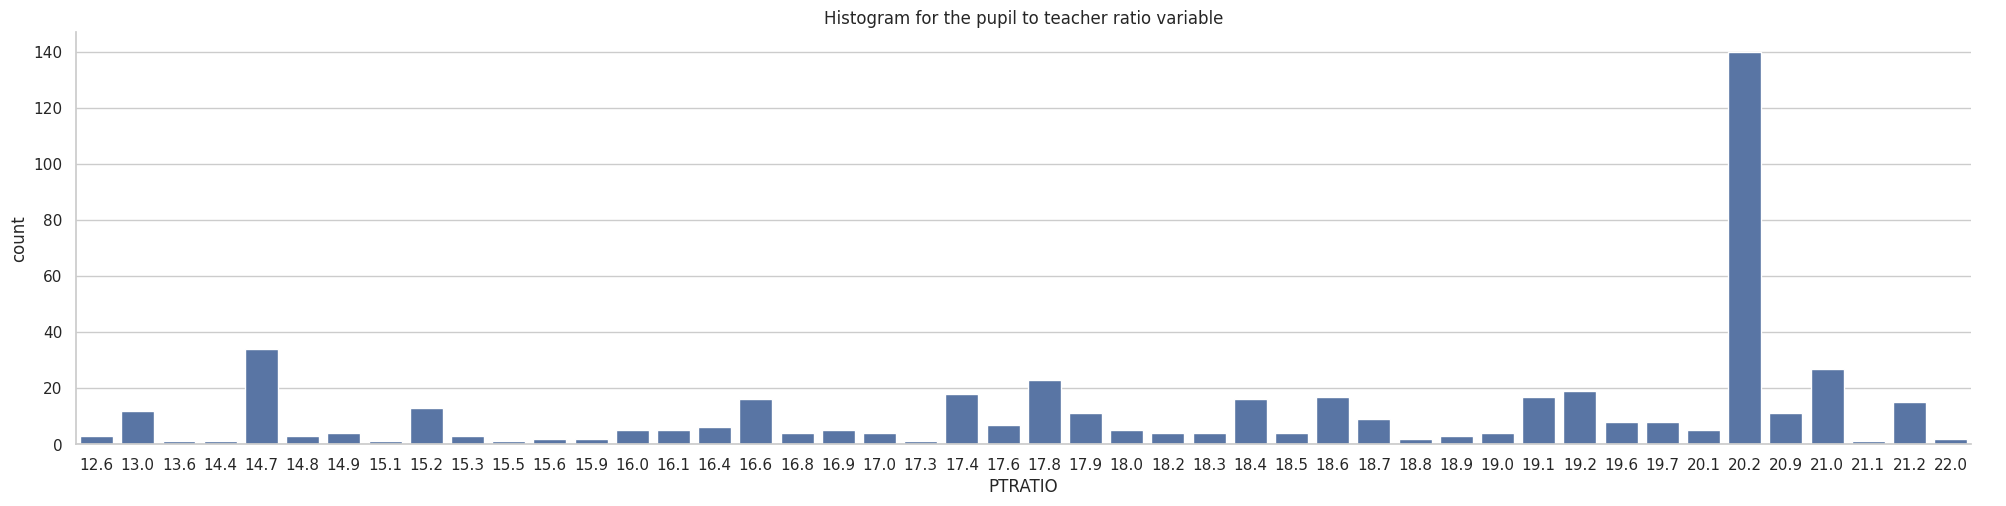

In [267]:
sns.catplot(x= "PTRATIO", kind = "count", data = boston_df, height = 5, aspect = 4)
pyplot.title("Histogram for the pupil to teacher ratio variable")
pyplot.show()

#The least common pupil ratio seems to be around 13 - 14. 

# Task 3

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



### Hypothesis
*   $H\_0: µ\_1 = µ\_2$ ("there is no significant difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a significant difference in median value of houses bounded by the Charles river")

In [268]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                  boston_df[boston_df['CHAS'] == 1]['MEDV'], center= 'median')

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                 boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False) 

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

#### P_value < 0.05 (alpha value), so hypothesis is rejected.
#### So, there is a significant difference in median value of houses bounded by the Charles river 


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)



### Hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three MEDV are equal)
*   $H\_1:$ At least one of the MEDV differ 

In [269]:
scipy.stats.levene(boston_df['MEDV'][boston_df['ages'] == '35 years and younger'],
                   boston_df['MEDV'][boston_df['ages'] == 'between 35 and 70'], 
                   boston_df['MEDV'][boston_df['ages'] == '70 years and older'], 
                   center='median')

thrityfive_lower = boston_df['MEDV'][boston_df['ages'] == '35 years and younger']
thrityfive_seventy = boston_df['MEDV'][boston_df['ages'] == 'between 35 and 70']
seventy_upper = boston_df['MEDV'][boston_df['ages'] == '70 years and older']


f_statistic, p_value = scipy.stats.f_oneway(thrityfive_lower, thrityfive_seventy, seventy_upper)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### P_value < 0.05 (alpha value), so hypothesis is rejected.
#### So, at least one MEDV differ for an age group 


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)



### Hypothesis

*   $H\_0:$ Nitric oxide concentrations is not correlated with non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with non-retail business acres per town


In [270]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### P_value < 0.05 (alpha value), so hypothesis is rejected.
#### So, Nitric oxide concentrations is correlated with non-retail business acres per town


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### Hypothesis

*   $H\_0:$ Additional weighted distance  to the five Boston employment centres has no impact on the median value of owner occupied homes
*   $H\_1:$ Additional weighted distance  to the five Boston employment centres has an impact on the median value of owner occupied homes

In [271]:
model = ols('MEDV ~ DIS', data = boston_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        20:58:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### P_value < 0.05 (alpha value), so hypothesis is rejected.
#### Coefficient is 0.25 (rounded to the nearest hundredth)
#### So, Additional weighted distance  to the five Boston employment centres has an impact on the median value of owner occupied homes
